In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch 
import torchvision
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dmsp-particle-precipitate-flux/AI_Ready_DMSP_Data.csv


In [2]:
from copy import deepcopy

electron = pd.read_csv("/kaggle/input/dmsp-particle-precipitate-flux/AI_Ready_DMSP_Data.csv")
electron1 = deepcopy(electron)
electron2 = deepcopy(electron)
electron3 = deepcopy(electron)

In [3]:
electron.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [4]:
electron.shape

(77367, 154)

In [5]:
print(f"There are {len(electron.columns)} columns in electron precipitate flux database")

There are 154 columns in electron precipitate flux database


In [6]:
print(f"There are {len(electron)} recorded instances of electron precipitate flux database")

There are 77367 recorded instances of electron precipitate flux database


In [7]:
# lets find out categorical & numerical columns

In [8]:
numerics=electron.select_dtypes(include=['number']).columns
print(f"There are {len(numerics)} numerical columns in database")

There are 153 numerical columns in database


In [9]:
categorical_count = len(electron.select_dtypes(include=['object']).columns)
categorical_cols = electron.select_dtypes(include=['object']).columns
print(f"There are {categorical_count} categorical columns in database")

There are 1 categorical columns in database


In [10]:
# Lets check out the '1' categorical column
electron[categorical_cols].head()

,Datetimes
0,1987-01-12 12:57:00
1,1987-01-12 12:58:00
2,1987-01-12 13:01:00
3,1987-01-12 13:02:00
4,1987-01-12 13:03:00


In [11]:
electron[categorical_cols].dtypes

Datetimes    object
dtype: object

In [12]:
# lets convert object dtype of datetime dtype
# electron['Datetimes'] =  pd.to_datetime(electron['Datetimes'])
electron.Datetimes.head()

0    1987-01-12 12:57:00
1    1987-01-12 12:58:00
2    1987-01-12 13:01:00
3    1987-01-12 13:02:00
4    1987-01-12 13:03:00
Name: Datetimes, dtype: object

In [13]:
# Lets check out numerical cols,
electron[numerics].columns

Index(['SC_AACGM_LAT', 'SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX',
       'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD',
       'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy',
       ...
       'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min',
       'vx_5min', 'psw_5min', 'borovsky_5min', 'newell_5min'],
      dtype='object', length=153)

In [14]:
for col in electron.columns:
    if electron[col].isnull().sum()>0:
        print(col,electron[col].isnull().sum())

PC_30min 1
vsw_30min 1
vx_30min 1
psw_30min 1
borovsky_30min 1
newell_30min 1
F107_15min 1
Bz_15min 1
By_15min 1
Bx_15min 1
AE_15min 1
AL_15min 1
AU_15min 1
SymH_15min 1
PC_15min 1
vsw_15min 1
vx_15min 1
psw_15min 1
borovsky_15min 1
newell_15min 1
F107_10min 1
Bz_10min 1
By_10min 1
Bx_10min 1
AE_10min 1
AL_10min 1
AU_10min 1
SymH_10min 1
PC_10min 1
vsw_10min 1
vx_10min 1
psw_10min 1
borovsky_10min 1
newell_10min 1
F107_5min 1
Bz_5min 1
By_5min 1
Bx_5min 1
AE_5min 1
AL_5min 1
AU_5min 1
SymH_5min 1
PC_5min 1
vsw_5min 1
vx_5min 1
psw_5min 1
borovsky_5min 1
newell_5min 1


In [15]:
electron.columns

Index(['Datetimes', 'SC_AACGM_LAT', 'SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX',
       'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD',
       'ID_SC', 'sin_ut', 'cos_ut',
       ...
       'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min',
       'vx_5min', 'psw_5min', 'borovsky_5min', 'newell_5min'],
      dtype='object', length=154)

In [16]:
electron['SC_AACGM_LAT'].head()

0    51.143220
1    54.137207
2    62.928176
3    65.719631
4    68.392364
Name: SC_AACGM_LAT, dtype: float64

In [17]:
electron['SC_AACGM_LTIME']

0         5.664024
1         5.535848
2         5.031172
3         4.794780
4         4.507448
           ...    
77362    21.240201
77363    21.138485
77364    20.968127
77365    20.896789
77366    20.370770
Name: SC_AACGM_LTIME, Length: 77367, dtype: float64

In [18]:
electron['ELE_TOTAL_ENERGY_FLUX_STD']

0        0.411230
1        0.478268
2        0.603362
3        0.103648
4        0.114959
           ...   
77362    0.248978
77363    0.318602
77364    0.441666
77365    0.516674
77366    0.392372
Name: ELE_TOTAL_ENERGY_FLUX_STD, Length: 77367, dtype: float64

In [19]:
electron['AU_5min']

0        25.0
1        25.0
2        24.0
3        24.0
4        24.0
         ... 
77362    43.0
77363    43.0
77364    50.0
77365    50.0
77366     NaN
Name: AU_5min, Length: 77367, dtype: float64

In [20]:
electron.iloc[:,0:10].head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455


* This set of columns have lot of variance,

In [21]:
electron.iloc[:,10:20].head()

,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,Bz,By,Bx,AE,AL
0,0.205104,0.97874,0.996134,0.087845,68.9,2.78,6.40,-3.49,82.0,-58.0
1,0.205104,0.97874,0.992626,0.121216,68.9,2.78,6.40,-3.49,82.0,-58.0
2,0.205104,0.97874,0.968006,0.250928,68.9,1.13,6.49,-3.20,96.0,-75.0
3,0.205104,0.97874,0.950633,0.310316,68.9,1.13,6.49,-3.20,96.0,-75.0
4,0.205104,0.97874,0.924624,0.380881,68.9,1.13,6.49,-3.20,96.0,-75.0


In [22]:
electron.iloc[:,20:30].head()

,AU,SymH,PC,vsw,vx,psw,borovsky,newell,F107_6hr,Bz_6hr
0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,68.9,3.143333
1,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,68.9,3.143333
2,21.0,1.0,0.57,350.7,-350.4,3.28,20729.743519,2683.621358,68.9,2.975833
3,21.0,1.0,0.57,350.7,-350.4,3.28,20729.743519,2683.621358,68.9,2.975833
4,21.0,1.0,0.57,350.7,-350.4,3.28,20729.743519,2683.621358,68.9,2.975833


In [23]:
electron.iloc[:,30:40].head()

,By_6hr,Bx_6hr,AE_6hr,AL_6hr,AU_6hr,SymH_6hr,PC_6hr,vsw_6hr,vx_6hr,psw_6hr
0,5.213333,-2.877500,93.333333,-18.75,74.333333,-7.916667,1.341667,337.7,-337.25,3.977500
1,5.213333,-2.877500,93.333333,-18.75,74.333333,-7.916667,1.341667,337.7,-337.25,3.977500
2,5.298333,-2.364167,80.166667,-14.50,65.500000,-6.583333,1.236667,338.1,-337.65,4.078333
3,5.298333,-2.364167,80.166667,-14.50,65.500000,-6.583333,1.236667,338.1,-337.65,4.078333
4,5.298333,-2.364167,80.166667,-14.50,65.500000,-6.583333,1.236667,338.1,-337.65,4.078333


In [24]:
electron.iloc[:,40:50].head()

,borovsky_6hr,newell_6hr,F107_5hr,Bz_5hr,By_5hr,Bx_5hr,AE_5hr,AL_5hr,AU_5hr,SymH_5hr
0,13556.319494,1205.609958,68.9,1.155,6.5025,0.437500,52.416667,-4.25,47.916667,3.000000
1,13556.319494,1205.609958,68.9,1.155,6.5025,0.437500,52.416667,-4.25,47.916667,3.000000
2,15091.975065,1329.868759,68.9,1.095,6.5750,0.116667,55.333333,-6.50,48.583333,3.416667
3,15091.975065,1329.868759,68.9,1.095,6.5750,0.116667,55.333333,-6.50,48.583333,3.416667
4,15091.975065,1329.868759,68.9,1.095,6.5750,0.116667,55.333333,-6.50,48.583333,3.416667


In [25]:
electron.iloc[:,50:60].head()

,PC_5hr,vsw_5hr,vx_5hr,psw_5hr,borovsky_5hr,newell_5hr,F107_3hr,Bz_3hr,By_3hr,Bx_3hr
0,0.960833,346.291667,-345.825,4.9125,29030.966525,2643.564215,68.9,3.435000,9.126667,0.365000
1,0.960833,346.291667,-345.825,4.9125,29030.966525,2643.564215,68.9,3.435000,9.126667,0.365000
2,0.989167,346.558333,-346.050,4.9625,29352.023741,2712.809750,68.9,2.738333,9.205000,-0.813333
3,0.989167,346.558333,-346.050,4.9625,29352.023741,2712.809750,68.9,2.738333,9.205000,-0.813333
4,0.989167,346.558333,-346.050,4.9625,29352.023741,2712.809750,68.9,2.738333,9.205000,-0.813333


In [26]:
electron.iloc[:,60:70].head()

,AE_3hr,AL_3hr,AU_3hr,SymH_3hr,PC_3hr,vsw_3hr,vx_3hr,psw_3hr,borovsky_3hr,newell_3hr
0,79.500000,-48.666667,30.0,7.666667,0.270,362.783333,-361.516667,5.326667,19770.271225,2783.159088
1,79.500000,-48.666667,30.0,7.666667,0.270,362.783333,-361.516667,5.326667,19770.271225,2783.159088
2,85.333333,-53.333333,31.0,8.000000,0.295,361.650000,-360.400000,5.280000,21831.275082,3087.208789
3,85.333333,-53.333333,31.0,8.000000,0.295,361.650000,-360.400000,5.280000,21831.275082,3087.208789
4,85.333333,-53.333333,31.0,8.000000,0.295,361.650000,-360.400000,5.280000,21831.275082,3087.208789


In [27]:
electron.iloc[:,70:80].head()

,F107_1hr,Bz_1hr,By_1hr,Bx_1hr,AE_1hr,AL_1hr,AU_1hr,SymH_1hr,PC_1hr,vsw_1hr
0,68.9,3.980000,4.960000,0.578333,214.833333,-169.5,45.0,7.500000,0.830000,368.283333
1,68.9,3.980000,4.960000,0.578333,214.833333,-169.5,45.0,7.500000,0.830000,368.283333
2,68.9,3.483333,5.083333,0.345000,194.666667,-152.5,42.0,7.666667,0.763333,366.933333
3,68.9,3.483333,5.083333,0.345000,194.666667,-152.5,42.0,7.666667,0.763333,366.933333
4,68.9,3.483333,5.083333,0.345000,194.666667,-152.5,42.0,7.666667,0.763333,366.933333


In [28]:
electron.iloc[:,80:90].head()

,vx_1hr,psw_1hr,borovsky_1hr,newell_1hr,F107_45min,Bz_45min,By_45min,Bx_45min,AE_45min,AL_45min
0,-367.983333,4.765,15725.454759,1005.416768,68.9,2.81,6.06,1.00,137.0,-107.0
1,-367.983333,4.765,15725.454759,1005.416768,68.9,2.81,6.06,1.00,137.0,-107.0
2,-366.600000,4.770,17715.834824,1181.409630,68.9,4.45,5.58,2.49,127.0,-92.0
3,-366.600000,4.770,17715.834824,1181.409630,68.9,4.45,5.58,2.49,127.0,-92.0
4,-366.600000,4.770,17715.834824,1181.409630,68.9,4.45,5.58,2.49,127.0,-92.0


In [29]:
electron.iloc[:,90:100].head()

,AU_45min,SymH_45min,PC_45min,vsw_45min,vx_45min,psw_45min,borovsky_45min,newell_45min,F107_30min,Bz_30min
0,30.0,7.0,0.53,363.8,-363.4,4.42,19981.769117,1765.410665,68.9,0.56
1,30.0,7.0,0.53,363.8,-363.4,4.42,19981.769117,1765.410665,68.9,0.56
2,34.0,6.0,0.62,364.9,-364.4,4.11,11208.996401,1042.855475,68.9,1.14
3,34.0,6.0,0.62,364.9,-364.4,4.11,11208.996401,1042.855475,68.9,1.14
4,34.0,6.0,0.62,364.9,-364.4,4.11,11208.996401,1042.855475,68.9,1.14


In [30]:
electron.iloc[:,100:110].head()

,By_30min,Bx_30min,AE_30min,AL_30min,AU_30min,SymH_30min,PC_30min,vsw_30min,vx_30min,psw_30min
0,7.67,-2.12,74.0,-48.0,25.0,5.0,0.51,354.0,-353.7,3.61
1,7.67,-2.12,74.0,-48.0,25.0,5.0,0.51,354.0,-353.7,3.61
2,7.16,-2.70,72.0,-44.0,27.0,4.0,0.52,359.0,-358.6,3.66
3,7.16,-2.70,72.0,-44.0,27.0,4.0,0.52,359.0,-358.6,3.66
4,7.16,-2.70,72.0,-44.0,27.0,4.0,0.52,359.0,-358.6,3.66


In [31]:
electron.iloc[:,110:120].head()

,borovsky_30min,newell_30min,F107_15min,Bz_15min,By_15min,Bx_15min,AE_15min,AL_15min,AU_15min,SymH_15min
0,23353.905886,3500.619134,68.9,1.72,7.02,-2.64,61.0,-37.0,23.0,3.0
1,23353.905886,3500.619134,68.9,1.72,7.02,-2.64,61.0,-37.0,23.0,3.0
2,22319.235425,3019.391879,68.9,1.25,6.52,-3.03,56.0,-36.0,19.0,4.0
3,22319.235425,3019.391879,68.9,1.25,6.52,-3.03,56.0,-36.0,19.0,4.0
4,22319.235425,3019.391879,68.9,1.25,6.52,-3.03,56.0,-36.0,19.0,4.0


In [32]:
electron.iloc[:,120:130].head()

,PC_15min,vsw_15min,vx_15min,psw_15min,borovsky_15min,newell_15min,F107_10min,Bz_10min,By_10min,Bx_10min
0,0.61,354.6,-354.1,3.13,17383.697547,2591.563107,68.9,1.25,6.52,-3.03
1,0.61,354.6,-354.1,3.13,17383.697547,2591.563107,68.9,1.25,6.52,-3.03
2,0.71,364.4,-363.6,3.09,19335.344017,2762.596108,68.9,1.51,6.42,-2.72
3,0.71,364.4,-363.6,3.09,19335.344017,2762.596108,68.9,1.51,6.42,-2.72
4,0.71,364.4,-363.6,3.09,19335.344017,2762.596108,68.9,1.51,6.42,-2.72


In [33]:
electron.iloc[:,130:140].head()

,AE_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,vx_10min,psw_10min,borovsky_10min,newell_10min
0,56.0,-36.0,19.0,4.0,0.71,364.4,-363.6,3.09,19335.344017,2762.596108
1,56.0,-36.0,19.0,4.0,0.71,364.4,-363.6,3.09,19335.344017,2762.596108
2,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
3,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
4,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963


In [34]:
electron.iloc[:,140:155].head()

,F107_5min,Bz_5min,By_5min,Bx_5min,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,68.9,1.51,6.42,-2.72,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,68.9,1.51,6.42,-2.72,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,68.9,2.78,6.40,-3.49,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,68.9,2.78,6.40,-3.49,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,68.9,2.78,6.40,-3.49,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


* As we observe, the recorded data instances are maintained in a decreasing monotonic  way like, the data for precipitation is maintained & recorded for
 - 6hours,
 - then 5hours, 
 - then 3hours, 
 - then 1hour, 
 - then 45min, 
 - then 30min,
 - then 15min,
 - then 5min. 
 
**As we can understanding the columns are data in a bit large in number, we can try to reduce columns with help of dimensionality reduction techniques,lets first try out filling 48 missing values & then split the datasets and train a model , afterwards we can go for reduction techniques**.

---------------------
**Description about the collected data points at intervals of time is below at the neural network section**
-----------------------------------------------------------------------

In [35]:
electron.fillna(1,inplace=True)


In [36]:
electron.isnull().sum().sum()

0

* Cleared out missing values,

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 

X = electron.drop(electron.iloc[:,3:7].columns,axis=1)
X = electron.drop(['Datetimes'],axis=1)
y = electron['ELE_TOTAL_ENERGY_FLUX']
X.shape,y.shape

((77367, 153), (77367,))

**We haven't taken total & average Energy flux related columns as they are dependent on target.**

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((58025, 153), (58025,), (19342, 153), (19342,))

In [40]:
rfr = RandomForestRegressor(n_estimators=150)
rfr.fit(X_train,y_train)
rfr_preds = rfr.predict(X_test)

In [41]:
from sklearn import metrics 
def scores(predictions,y_test):
    mae = metrics.mean_absolute_error(y_test,predictions)
    mse = metrics.mean_squared_error(y_test,predictions)
    rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
    r2 = metrics.r2_score(y_test,predictions)

    return {'mae':mae,'mse':mse,'rmse':rmse,'r2Score':r2}
    

In [42]:
print(scores(rfr_preds,y_test))

{'mae': 308875762823.4393, 'mse': 4.6119448729162546e+26, 'rmse': 21475439164115.492, 'r2Score': 0.9220600169957328}


In [43]:
rfr.feature_importances_

array([4.34689220e-05, 5.99865661e-05, 9.87138263e-01, 1.17190930e-05,
       6.69197063e-04, 1.18110393e-03, 3.52564457e-09, 8.49581303e-06,
       1.34646451e-06, 5.40144886e-07, 9.73472430e-06, 1.62607619e-05,
       2.70192272e-06, 9.95155401e-06, 1.51574382e-05, 1.61177769e-04,
       3.89425081e-04, 9.78603529e-08, 1.17227462e-04, 7.40539970e-04,
       1.06252427e-05, 3.19914553e-04, 5.52013802e-05, 1.80073352e-05,
       2.82848100e-05, 4.58859224e-08, 2.92844863e-07, 1.05029676e-05,
       6.45646987e-04, 5.04070583e-04, 8.57915231e-05, 3.62857359e-07,
       5.00675157e-04, 9.60947437e-07, 7.19615088e-06, 6.85722188e-06,
       1.26972962e-05, 5.41886389e-07, 2.73801034e-05, 1.10134276e-05,
       2.76412228e-06, 1.88014062e-05, 1.51337680e-07, 5.82952172e-05,
       2.13559019e-07, 2.74651781e-05, 7.55767559e-06, 2.79239147e-05,
       6.84773131e-07, 8.95956733e-05, 8.72752556e-06, 5.46797037e-06,
       1.78377805e-05, 3.83279229e-05, 4.90140622e-09, 4.98393423e-06,
      

In [44]:
len(rfr.feature_importances_)

153

In [45]:
usefulFeatures = pd.DataFrame()
usefulFeatures['Features'] = X_train.columns
usefulFeatures['Importance'] = rfr.feature_importances_
usefulFeatures.sort_values("Importance",ascending=False)

,Features,Importance
2,ELE_TOTAL_ENERGY_FLUX,9.871383e-01
83,F107_45min,2.026279e-03
5,ELE_AVG_ENERGY_STD,1.181104e-03
19,AU,7.405400e-04
4,ELE_AVG_ENERGY,6.691971e-04
...,...,...
99,By_30min,5.000268e-09
54,newell_5hr,4.901406e-09
6,ID_SC,3.525645e-09
82,newell_1hr,2.993976e-09


In [46]:
usefulFeatures = list(usefulFeatures.sort_values("Importance", ascending=False)['Features'].head(135).values)
usefulFeatures

['ELE_TOTAL_ENERGY_FLUX',
 'F107_45min',
 'ELE_AVG_ENERGY_STD',
 'AU',
 'ELE_AVG_ENERGY',
 'Bz_6hr',
 'F107_5min',
 'By_6hr',
 'AL_6hr',
 'vsw_45min',
 'PC_3hr',
 'Bx',
 'newell_15min',
 'PC',
 'By_3hr',
 'AU_3hr',
 'By_1hr',
 'AL_1hr',
 'By',
 'AU_30min',
 'AU_5min',
 'PC_10min',
 'AL',
 'vx_10min',
 'By_15min',
 'PC_30min',
 'AL_10min',
 'PC_5hr',
 'Bx_6hr',
 'SymH_10min',
 'vsw_15min',
 'borovsky_45min',
 'By_5min',
 'AL_5min',
 'vsw_30min',
 'SC_AACGM_LTIME',
 'newell_30min',
 'By_5hr',
 'vsw',
 'AE_15min',
 'SC_AACGM_LAT',
 'SymH_5min',
 'Bx_10min',
 'Bx_1hr',
 'borovsky_5hr',
 'F107_30min',
 'psw_3hr',
 'Bx_45min',
 'SymH_45min',
 'PC_1hr',
 'psw',
 'AU_5hr',
 'AE_5hr',
 'psw_6hr',
 'AU_45min',
 'vx_30min',
 'PC_15min',
 'SymH_3hr',
 'psw_1hr',
 'Bz_3hr',
 'F107_5hr',
 'newell_45min',
 'vx',
 'psw_5hr',
 'newell_5min',
 'sin_SC_AACGM_LTIME',
 'borovsky_15min',
 'Bx_15min',
 'Bz',
 'vsw_6hr',
 'PC_45min',
 'ELE_TOTAL_ENERGY_FLUX_STD',
 'AU_10min',
 'vx_15min',
 'PC_5min',
 'borovs

In [47]:
# Useful features: 
df = electron[usefulFeatures]
print(df.shape)
X2 = df.drop(['ELE_TOTAL_ENERGY_FLUX'],axis=1)
y2 = df['ELE_TOTAL_ENERGY_FLUX']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.25,random_state=42)

rfr2 = RandomForestRegressor(n_estimators=150)
rfr2.fit(X_train2,y_train2)


(77367, 135)


RandomForestRegressor(n_estimators=150)

In [48]:
rfr2_preds = rfr2.predict(X_test2)
print(scores(rfr2_preds,y_test2))

{'mae': 1499917996154.5498, 'mse': 6.109709203541667e+27, 'rmse': 78164628851812.94, 'r2Score': -0.03251587910664733}



* Model's value is not so high here becoz of r2-score, lets try other ways of preprocessing the data

# Neural Network
  
  - PyTorch Version

**1. Reason of datapoints with time: 
As from research paper, most of the datapoints are collected according to solar wind  & geomagnetic conditions, and they are collected at regular intervals of time because, the past particle precipitate/solar wind history provides the current condition, the entire description of being collected data points for regular intervals of time is here**

Source: Research Paper 

* Description:

*Add solar wind and geomagnetic activity data time histories. In step (b) we aligned the instantaneous features (solar wind and geomagnetic activity indices) to the DMSP observation data samples, but
recognize that previous information from the solar wind and ionosphere and magnetosphere are also important to current particle precipitation and substorm behavior (Borovsky,  2020b, and references
therein). In order to capture such information, we attach to the data samples the time histories of each of the solar wind and geomagnetic activity indices data. This process is detailed in Figure 1d for the AE index during the time period chosen. Previous approaches have for simplicity assumed that the instantaneous values of these data points are sufficient, however we recognize that the purpose of these time
history data are different for near and far periods. For instance, over shorter time scales (from minutes to ∼an hour), solar wind time history provides a snapshot of current conditions, while over longer time scales (from hours to years) the solar wind time history provides climatology or trend information. Therefore, we treat the previous time steps in two different ways: for all data points within 1 h of the DMSP observation, we include the instantaneous value and beyond that we gradually increase numberof data points centered on the t − x point over which an average is calculated, where x is any number
of minutes before the time of the DMSP observation, for the t − 1 h and t − 3 h points we use a 30-min average and for the t − 6 h point we use a 1 hour average. Together with the instantaneous aligned data
shown in Figure 1c, the complete data set contains comprehensive information to specify and predict
substorm-scale phenomena*

**2. Why lot of dimensions/features:
AS per Research Paper,The high dimensionality of these data both reveal the amount of information required to capture substorm-scale behavior
in a particle precipitation model and motivate ML approaches as models capable of the requisite “expressive power.**

& 

**Additionally, past studies have shown
that solar wind information alone is insufficient to characterize auroral behavior (e.g., changes in critical
auroral parameters such as hemispheric power [HP] on substorm temporal scales [10s minutes] Newell
et al., 2001; Newell, Lee, et al., 2010) and that quantification of the magnetospheric state and monitoring
the global activity level are required for models that hope to capture substorm-scale phenomena (Deng
et al., 2019; Liou et al., 1998; Newell, Sotirelis, et al., 2010; Nishimura et al., 2016; Richmond et al., 1998).
These considerations drove the inclusive set of features that we explore in this work, compiling information
from the solar wind (e.g., IMF Bz), throughout the magnetosphere (e.g., the Borovsky coupling function),
and the global activity level (e.g., the symmetric-H [Sym-H] index). Note that prior to the algorithmic feature importance exploration, first physical understanding was used to construct the possible features of use
(this occurred in an International Space Sciences Institute [ISSI] working group [McGranaghan, 2019]).**

**Features**
=============================

* **AE**: auroral electrojet (provides a global, quantitative measure of auroral zone magnetic activity produced by enhanced Ionospheric currents flowing below and within the auroral oval)
    
* **symmetric-H [SymH]** index: One of the important indices for space weather. It indicates the intensity of magnetic storm, similarly to Dst index but with much higher time-resolution,

     - Dst(Disturbance Storm time) index means: (magnetic activity derived from a network of near-equatorial geomagnetic observatories that measures the intensity of the globally symmetrical equatorial electrojet (the "ring current") 
     

* **IMF, GSM co-ordinates:** solar wind interplanetary magnetic field
    
     - (he solar wind both controls the size of the magnetic cavity through its momentum flux or dynamic pressure and the energy flow into the magnetosphere coupled from the solar wind mechanical energy flux by the reconnection of the interplanetary magnetic field with the terrestrial field)
  
* **MLAT-magnetic latitude:** the angle whose tangent is one half the tangent of the magnetic dip at any given point

* **MLT-magnetic local time:** Longitude, which rotates with the Earth, is not a useful way of describing position in the magnetosphere. Instead, magnetic local time is used. This has value 0 (midnight) in the anti-sunward direction, 12 (noon) in the sunward direction and 6 (dawn) and 18 (dusk) perpendicular to the sunward/anti-sunward line.

* **AACGM-altitude-adjusted geomagnetic coordinates:** The AACGM coordinates of a given point, specified by its geographic latitude (λg), longitude (φg) and altitude (h) above the surface of the Earth, are determined by following the magnetic field line from the geographic starting point to the magnetic dipole equator.

* **Bx,By,Bz:** the solar wind's magnetic orientation in the up/down direction(X,y,Z-axes).

* **borovsky,newell:** associated with geomagnetic activity.

* **Vx/Vsw:** The solar wind velocity features 

* Few of first 5-7 features are regarding the electron flux.

* Most of features are regarding the collection of data at regular intervals of few above mentioned features.

* Coming to timings,  6hours,5hours,3hours,1hr,45min,30min,15min,5min, here we can observe, the collection of timings are closer for few collections. Example: for 1hr, 45min it wont vary much & for 45min, 30min, & for 30min, 15min & for 15min, 5min. So, let us try to remove few of features among these. We can consider, **1hr,30min,5min** and **remove the rest of 45min, 15min.**



In [49]:
electron.shape

(77367, 154)

## A. Importing Libraries

In [50]:
# Basic visualizations & storage libraries
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Libraries for loading data, training data, building model
import torchvision 
import torch
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F

# For performing transformations & generating metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix, classification_report

## B. Feature Engineering

* Let us remove 15min, 45min, 5hr related columns

In [51]:
fifteen,fortyfive,five = 0,0,0
for col in electron.columns:
    if col.endswith("_15min"):
        electron.drop(col,inplace=True,axis=1)
        fifteen += 1
    elif col.endswith("_45min"):
        electron.drop(col,inplace=True,axis=1)
        fortyfive += 1
    elif col.endswith("5hr"):
        electron.drop(col,inplace=True,axis=1)
        five += 1
        
print(f"{fifteen} columns are dropped of 15min,{fortyfive} columns are dropped of 45min,{five} columns are dropped of 5min")
print(f"Total of {fifteen+fortyfive+five} columns have been dropped")

14 columns are dropped of 15min,14 columns are dropped of 45min,14 columns are dropped of 5min
Total of 42 columns have been dropped


In [52]:
electron.shape

(77367, 112)

In [53]:
electron.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


**Making a copy of data & features for building the model**

In [54]:
electron_model = deepcopy(electron[1:])

In [55]:
electron_model = electron_model.drop(electron_model.iloc[:,4:7],axis=1)
electron_model.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
5,1987-01-12 13:04:00,70.905061,4.151097,8.838582e+10,6.0,-0.275637,-0.961262,0.205104,0.97874,0.885121,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [56]:
# Let us drop features with terms of ENERGY_FLUX, as these termed features arouse from TOTAL_ENERGY_FLUX, which is a target variable
Xt = electron_model.drop(['ELE_TOTAL_ENERGY_FLUX'],axis=1)
yt = electron_model['ELE_TOTAL_ENERGY_FLUX']
print(Xt.shape,yt.shape)

(77366, 108) (77366,)


**Let us plot the distribution of TOTAL_ENERGY_FLUX**

- **The plot shows a one-sided graph which can be termed as skew-distribution, the plot entirely is right-skewed. So, lets perform few methods to get data as balanced skew. Go through the below link to get the outcome of skewness and to overcome it.**

Refer: https://www.kaggle.com/code/sugataghosh/electron-energy-flux-prediction-part-1-eda?scriptVersionId=94367961&cellId=10

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX', ylabel='Density'>

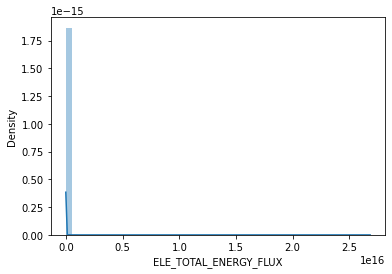

In [57]:
import seaborn as sns
sns.distplot(yt)

In [58]:
## Finding other skewed features

skewed = electron_model.skew().sort_values(ascending=False)
skewed[:20]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


ELE_TOTAL_ENERGY_FLUX    207.754110
psw_1hr                   10.857458
psw_3hr                   10.749616
psw                        6.764005
psw_30min                  6.382421
psw_5min                   6.340468
psw_10min                  6.144153
psw_6hr                    3.790792
AE_1hr                     1.810562
AE_30min                   1.767345
AE                         1.766281
AE_5min                    1.761236
AE_10min                   1.756869
AE_3hr                     1.715232
borovsky_6hr               1.696209
AU_30min                   1.684553
AU_6hr                     1.676385
AU_1hr                     1.660707
PC_3hr                     1.654731
AU                         1.650053
dtype: float64

In [59]:
skewed[21:50]

AU_10min          1.643436
AU_3hr            1.629335
AE_6hr            1.623550
borovsky_3hr      1.601873
borovsky_30min    1.584850
borovsky          1.569452
borovsky_5min     1.566845
borovsky_10min    1.565949
borovsky_1hr      1.529057
PC_1hr            1.428125
vsw_6hr           1.291798
Bz_30min          1.274438
vsw_3hr           1.268685
sin_doy           1.265708
vsw_1hr           1.250118
vsw_30min         1.248940
vsw               1.247947
vsw_5min          1.243450
vsw_10min         1.236419
Bz_10min          1.170132
Bz_6hr            1.149505
Bz_1hr            1.063302
Bz_5min           1.019807
Bz                0.902798
Bz_3hr            0.884599
PC_30min          0.681047
PC_5min           0.669934
newell_10min      0.654906
PC_10min          0.651839
dtype: float64

In [60]:
skewed[51:81]

newell_30min          0.649160
newell                0.644469
PC_6hr                0.632416
PC                    0.612759
newell_1hr            0.601569
newell_3hr            0.599772
newell_6hr            0.559414
cos_doy               0.447070
cos_SC_AACGM_LTIME    0.234437
Bx_30min              0.200076
Bx_10min              0.190056
Bx_6hr                0.134892
Bx_5min               0.134345
Bx                    0.126242
Bx_3hr                0.092548
Bx_1hr                0.081464
F107_6hr              0.077888
F107_3hr              0.069553
F107_30min            0.065203
F107_1hr              0.065025
F107                  0.064593
F107_10min            0.064083
F107_5min             0.063938
SC_AACGM_LTIME        0.059482
By_1hr                0.027765
sin_ut                0.019318
By_30min              0.015974
By_6hr               -0.004128
By_10min             -0.005374
cos_ut               -0.010467
dtype: float64

In [61]:
skewed[81:111]

By_5min              -0.023587
By                   -0.044888
By_3hr               -0.060892
SC_AACGM_LAT         -0.066835
sin_SC_AACGM_LTIME   -0.102980
vx_10min             -1.234736
vx_5min              -1.242260
vx                   -1.247402
vx_30min             -1.247534
vx_1hr               -1.250803
vx_3hr               -1.266674
vx_6hr               -1.289195
SymH                 -1.615403
SymH_5min            -1.628406
SymH_10min           -1.642226
AL_6hr               -1.690722
SymH_30min           -1.712261
SymH_1hr             -1.760049
AL_5min              -1.958792
SymH_3hr             -1.966041
AL_3hr               -1.966476
AL                   -1.967232
AL_10min             -1.972645
AL_30min             -1.996773
AL_1hr               -2.005165
SymH_6hr             -2.466227
ID_SC                -3.477086
dtype: float64

* Few of them are negatively skewed & most are positively skewed, the target variable is highly skewed towards right, so, need to perform log on target variable

<AxesSubplot:xlabel='ELE_TOTAL_ENERGY_FLUX', ylabel='Count'>

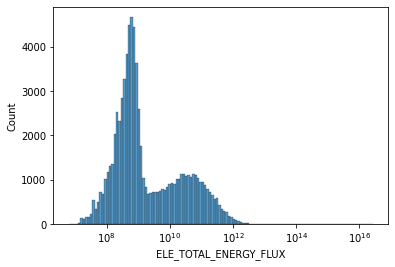

In [62]:
sns.histplot(data = electron_model, x = 'ELE_TOTAL_ENERGY_FLUX', log_scale = True)

**It looks like a better skewed than the previous one, lets transform the entire feature to the log transformed**

In [63]:
electron_model['ELE_TOTAL_ENERGY_FLUX_LOG'] = electron_model['ELE_TOTAL_ENERGY_FLUX'].apply(lambda x:np.log(x))
electron_model.drop(['ELE_TOTAL_ENERGY_FLUX'],inplace=True,axis=1)
electron_model['ELE_TOTAL_ENERGY_FLUX_LOG']

1        19.340899
2        19.917878
3        23.685880
4        26.692826
5        25.204977
           ...    
77362    19.779554
77363    19.084570
77364    18.415116
77365    18.989986
77366    18.466227
Name: ELE_TOTAL_ENERGY_FLUX_LOG, Length: 77366, dtype: float64

In [64]:
electron_model.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,...,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,ELE_TOTAL_ENERGY_FLUX_LOG
1,1987-01-12 12:58:00,54.137207,5.535848,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,0.121216,...,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,19.340899
2,1987-01-12 13:01:00,62.928176,5.031172,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,0.250928,...,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,19.917878
3,1987-01-12 13:02:00,65.719631,4.794780,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,0.310316,...,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,23.685880
4,1987-01-12 13:03:00,68.392364,4.507448,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,0.380881,...,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,26.692826
5,1987-01-12 13:04:00,70.905061,4.151097,6.0,-0.275637,-0.961262,0.205104,0.97874,0.885121,0.465360,...,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,25.204977


* Its dropped

In [65]:
# # Didnt get executed bcoz of high memory
# def logTrans(df,feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
#     logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

#     plt.figure(figsize=(15,6))
#     plt.subplot(1,2,1)
#     plt.title("Distribution before Transformation", fontsize=15)
#     sns.histplot(df[feature], kde=True, color="red")
#     plt.subplot(1,2,2)
    
#     df_log = pd.DataFrame(logTr.fit_transform(df))
#     plt.title("Distribution after Transformation", fontsize=15)
#     sns.histplot(df_log,bins=20, kde=True , legend=False)
#     plt.xlabel(feature)
#     plt.show()
    
# #     print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
# logTrans(electron_model,feature="ELE_TOTAL_ENERGY_FLUX")

In [66]:
## Plotting the other features

# plt.figure(figsize=(11,13))
# for i in list(enumerate(electron_model.columns)):
#     plt.subplot(2, 4, i[0]+1)
#     sns.histplot(data = electron_model[i[1]], kde=True)  # Histogram with KDE line
    
# plt.tight_layout()  
# plt.show()

In [67]:
## Let us do pairwise correlations, checking correlation value of pairs of columns

def correlation_score(df,cols):
    df_corr = pd.DataFrame(columns=['Feature1','Feature2','Correlation_score'])
    idx = 0 
    for i in range(len(cols)):
        for j in range(i+1,len(cols)):
            feature1 = df[cols[i]]
            feature2 = df[cols[j]]
            df_corr.loc[idx] = [cols[i],cols[j],feature1.corr(feature2)]
            idx += 1
    return df_corr.sort_values(by='Correlation_score',ascending=False)
    
cols = [feature for feature in electron_model.columns[1:] if feature!='ELE_TOTAL_ENERGY_FLUX']
correlation_score(electron_model,cols)

,Feature1,Feature2,Correlation_score
5385,F107_10min,F107_5min,0.999897
1010,F107,F107_5min,0.999849
996,F107,F107_10min,0.999747
4195,F107_1hr,F107_30min,0.999501
4888,F107_30min,F107_10min,0.999471
...,...,...,...
5217,vsw_30min,vx_30min,-0.999745
1773,vsw,vx,-0.999749
4650,vsw_1hr,vx_1hr,-0.999763
3887,vsw_3hr,vx_3hr,-0.999777


* First few are highly positively correlated near to 1, last are negatively correlated which means positive correlated features are directly proportional(as one decreases other increases)& negative correlated features are indirectly proportional (as one increases other decreases)

In [68]:
# Let's attach back the date & processit 
# df['year'] = df['ArrivalDate'].dt.year
# df['month'] = df['ArrivalDate'].dt.month

electron_model['Datetimes'] = pd.to_datetime(electron_model['Datetimes']) 
electron_model['Year']= electron_model['Datetimes'].dt.year
electron_model['Month']= electron_model['Datetimes'].dt.month
electron_model['Day']= electron_model['Datetimes'].dt.day
electron_model['Hour'] = electron_model['Datetimes'].dt.hour
electron_model['Minute'] = electron_model['Datetimes'].dt.minute
electron_model.head()


,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,...,vx_5min,psw_5min,borovsky_5min,newell_5min,ELE_TOTAL_ENERGY_FLUX_LOG,Year,Month,Day,Hour,Minute
1,1987-01-12 12:58:00,54.137207,5.535848,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,0.121216,...,-355.5,2.96,17439.640589,2489.686963,19.340899,1987,1,12,12,58
2,1987-01-12 13:01:00,62.928176,5.031172,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,0.250928,...,-354.1,3.20,14199.368957,1847.748015,19.917878,1987,1,12,13,1
3,1987-01-12 13:02:00,65.719631,4.794780,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,0.310316,...,-354.1,3.20,14199.368957,1847.748015,23.685880,1987,1,12,13,2
4,1987-01-12 13:03:00,68.392364,4.507448,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,0.380881,...,-354.1,3.20,14199.368957,1847.748015,26.692826,1987,1,12,13,3
5,1987-01-12 13:04:00,70.905061,4.151097,6.0,-0.275637,-0.961262,0.205104,0.97874,0.885121,0.465360,...,-354.1,3.20,14199.368957,1847.748015,25.204977,1987,1,12,13,4


* Last few columns are added as extractors of date time module & we can drop Datetimes 1st column

In [69]:
electron_model.drop(['Datetimes'],inplace=True,axis=1)

In [70]:
## lets us start perfoming modelling operations beginning with train_test_split

predictors = electron_model.drop(["ELE_TOTAL_ENERGY_FLUX_LOG"],axis=1)
targets = electron_model["ELE_TOTAL_ENERGY_FLUX_LOG"]
predictor_train,predictor_test,target_train,target_test = train_test_split(predictors,targets,test_size=0.3,shuffle=True)

In [71]:
predictor_train.reset_index(drop = True, inplace = True)
predictor_test.reset_index(drop = True, inplace = True)
target_train.reset_index(drop = True, inplace = True)
target_test.reset_index(drop = True, inplace = True)

predictor_train = predictor_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [72]:
predictor_test = predictor_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [73]:
target_train = target_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [74]:
target_test = target_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [75]:
# Lets get the shape of them 
print("Shapes of predictor & target training data: ")
print(predictor_train.shape)
print(target_train.shape)

print("\n Shapes of predictor & target testing data: ")
print(predictor_test.shape)
print(target_test.shape)

Shapes of predictor & target training data: 
(54156, 112)
(54156,)

 Shapes of predictor & target testing data: 
(23210, 112)
(23210,)


In [76]:
## Let us normalize training data to get all values to a scaling factor of (0,1)

for col in predictor_train.columns:
    predictor_train[col] = (predictor_train[col] - predictor_train[col].min()) / (predictor_train[col].max() - predictor_train[col].min())

In [77]:
predictor_train.head()

,SC_AACGM_LAT,SC_AACGM_LTIME,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,Year,Month,Day,Hour,Minute
0,0.670637,0.299564,0.777778,0.023142,0.349649,0.206075,0.095475,0.975884,0.346592,0.474663,...,0.530886,0.470401,0.044289,0.028718,0.015289,1.0,0.636364,0.200000,0.695652,0.847458
1,0.554400,0.840511,0.777778,0.797411,0.098072,0.021842,0.646294,0.078619,0.769143,0.734542,...,0.337804,0.660115,0.019733,0.008143,0.004889,1.0,0.818182,0.566667,0.391304,0.576271
2,0.566353,0.755744,0.777778,0.333097,0.028679,0.372299,0.983424,0.000322,0.517951,0.621106,...,0.621720,0.376486,0.053278,0.206270,0.494073,1.0,1.000000,0.500000,0.565217,0.305085
3,0.870291,0.472715,0.111111,0.497818,0.000005,0.241938,0.071707,0.585203,0.007313,0.096699,...,0.472409,0.526421,0.039246,0.404769,0.520482,0.0,0.636364,0.033333,0.521739,0.016949
4,0.111130,0.709077,0.777778,0.995433,0.432577,0.055932,0.270120,0.016453,0.372791,0.619247,...,0.482174,0.516182,0.071695,0.274490,0.531901,1.0,0.727273,0.066667,0.260870,0.525424


**We can observe, all the values of features are in between 0 & 1**

In [78]:
predictor_train.describe()


,SC_AACGM_LAT,SC_AACGM_LTIME,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,Year,Month,Day,Hour,Minute
count,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,...,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000,54156.000000
mean,0.454649,0.504424,0.748443,0.493965,0.504039,0.279811,0.410371,0.515344,0.460870,0.526374,...,0.476264,0.522852,0.039244,0.163173,0.301917,0.972426,0.679231,0.495861,0.497547,0.499398
std,0.245297,0.259111,0.121580,0.349531,0.357465,0.259915,0.354904,0.416891,0.272837,0.196416,...,0.085222,0.084868,0.040332,0.149882,0.264763,0.156405,0.218871,0.277486,0.303736,0.292776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251147,0.284073,0.666667,0.147993,0.141850,0.075053,0.080843,0.041808,0.255087,0.362622,...,0.419461,0.486995,0.018636,0.049692,0.061785,1.000000,0.545455,0.266667,0.217391,0.254237
50%,0.476753,0.445300,0.777778,0.493455,0.513091,0.223751,0.325164,0.602760,0.441902,0.507671,...,0.463937,0.535248,0.028283,0.129114,0.236246,1.000000,0.636364,0.500000,0.521739,0.491525
75%,0.647655,0.745914,0.777778,0.837795,0.864190,0.398478,0.770810,0.950394,0.661722,0.679684,...,0.512178,0.579146,0.045823,0.232727,0.497771,1.000000,0.818182,0.700000,0.739130,0.745763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
## Let us normalize test data to get all values to a scaling factor of (0,1)

for col in predictor_test.columns:
    predictor_test[col] = (predictor_test[col] - predictor_test[col].min()) / (predictor_test[col].max() - predictor_test[col].min())

## C. Building the Model

1. https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-create-a-neural-network-for-regression-with-pytorch.md

2. https://visualstudiomagazine.com/articles/2021/02/11/pytorch-define.aspx

**Creating DataLoader class**

In [109]:
predictor_train.shape

(54156, 112)

In [84]:

class Mesoscale(Dataset):
    def __init__(self,X_data,y_data):
        self.X_data = X_data
        self.y_data = y_data 
    def __getitem__(self,idx):
        return self.X_data[idx,:],self.y_data[idx]
    def __len__(self):
        return len(self.X_data)
    
class Mesotest(Dataset):
    def __init__(self,X_data,y_data):
        self.X_data = X_data 
        self.y_data = y_data
    def __getitem__(self,idx):
        return self.X_data[idx,:],self.y_data[idx]
    def __len__(self):
        return len(self.X_data)

predictor_trains = torch.tensor(predictor_train.to_numpy())
target_trains = torch.tensor(target_train.to_numpy())
predictor_tests = torch.tensor(predictor_test.to_numpy())
target_tests = torch.tensor(target_test.to_numpy())
trainData = Mesoscale(predictor_trains,target_train)
testData = Mesotest(predictor_tests,target_test)

In [85]:
## setting configurations
EPOCHS = 15
BATCHSIZE = 128

trainLoader = DataLoader(trainData,batch_size=BATCHSIZE,shuffle=True)
testLoader = DataLoader(testData,batch_size=BATCHSIZE,shuffle=True)

In [86]:
predictor_trains.shape

torch.Size([54156, 112])

In [87]:
print((next(iter(trainLoader))[0][0]))

tensor([5.7383e-01, 2.3898e-01, 7.7778e-01, 1.3882e-01, 1.5424e-01, 1.7239e-01,
        1.2224e-01, 9.9882e-01, 5.3434e-01, 4.4212e-01, 9.4929e-02, 3.6729e-01,
        3.3009e-01, 4.4335e-02, 9.4725e-01, 1.5072e-01, 8.1281e-01, 4.2514e-01,
        1.7090e-01, 8.2656e-01, 1.4251e-01, 5.8280e-01, 8.7420e-01, 4.3906e-01,
        3.3606e-01, 4.2866e-01, 5.2786e-01, 7.9865e-02, 8.8342e-01, 1.0753e-01,
        7.8426e-01, 2.0761e-01, 9.3631e-02, 9.0442e-01, 7.3920e-02, 6.7824e-02,
        6.3285e-02, 4.3906e-01, 5.8885e-01, 3.4428e-01, 5.5707e-01, 5.3222e-02,
        9.5839e-01, 1.9918e-01, 9.3183e-01, 1.3859e-01, 1.9115e-01, 8.1134e-01,
        1.3264e-01, 1.3208e-01, 8.6836e-02, 4.4212e-01, 2.5867e-01, 5.0620e-01,
        5.7521e-01, 3.8380e-02, 9.6449e-01, 1.5573e-01, 8.5646e-01, 2.1859e-01,
        1.6858e-01, 8.3372e-01, 1.0573e-01, 4.0186e-02, 1.1304e-02, 4.4212e-01,
        1.8840e-01, 5.2199e-01, 4.4909e-01, 4.6455e-02, 9.5109e-01, 1.6634e-01,
        8.3333e-01, 2.6764e-01, 4.3142e-

In [154]:
class Flux(nn.Module):
    def __init__(self):
        super(Flux,self).__init__()
        self.layer1 = nn.Linear(112,240)
        self.layer2 = nn.Linear(240,280)
        self.layer3 = nn.Linear(280,140)
        self.layer4 = nn.Linear(140,64)
        self.layer5 = nn.Linear(64,1)   
        
        self.dropout1 = nn.Dropout2d(0.25)
        
    def forward(self,x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x 
        

In [155]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [156]:
models = Flux()
models.to(device)
print(models)
criterion = nn.MSELoss()
optimizer = optim.Adam(models.parameters(),lr=0.01)

Flux(
  (layer1): Linear(in_features=112, out_features=240, bias=True)
  (layer2): Linear(in_features=240, out_features=280, bias=True)
  (layer3): Linear(in_features=280, out_features=140, bias=True)
  (layer4): Linear(in_features=140, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=1, bias=True)
  (dropout1): Dropout2d(p=0.25, inplace=False)
)


In [ ]:
from tqdm import tqdm
def train(models, device, train_loader, optimizer, epoch,criterion):
    models.train()
    # starts
    pbar = tqdm(train_loader)
    # Gets the progress bar
    # enumerate through index and data
    for batch_idx,(data, target) in enumerate(pbar):
        data, target = data.to(device).float(), target.to(device).float()
        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = models(data)
        loss = criterion(output, target)
        # Calculates the loss function
        loss.backward()
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move to next parameter
        pbar.set_description(desc= f'Epoch={epoch} loss={loss.item()} batch_id={batch_idx}')
        
def test(models, device, testLoader,criterion):
    models.eval()
    test_loss = 0
    correct = 0
    # initiate variable
    with torch.no_grad(): 
        for data, target in testLoader: 
            data, target = data.to(device).float(), target.to(device).float()
            output = models(data) 
            criterion = nn.MSELoss(reduction='mean')
            test_loss += criterion(output, target).item()  
            pred = output.argmax(dim=1,keepdim=True)
            
            if torch.equal(pred,target):
                correct += 1 
    test_loss /= len(testLoader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testLoader.dataset),
        100. * correct / len(testLoader.dataset)))


# recalls the model
optimizer = optim.SGD(models.parameters(), lr=0.01)
# optimzier updates the parameters
criterion = nn.MSELoss()
# model is iterated for 2 epochs
for epoch in range(25):
    train(models, device, trainLoader, optimizer, epoch,criterion)
    test(models, device, testLoader,criterion)

Epoch=0 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 219.46it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=1 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 199.29it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=2 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 212.95it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=3 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 222.49it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=4 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 216.89it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=5 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 219.71it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=6 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 197.15it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=7 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 222.31it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=8 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 206.82it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=9 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 202.95it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=10 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 201.19it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=11 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 204.42it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=12 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 212.72it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=13 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 218.66it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=14 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 218.34it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=15 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 198.00it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=16 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 211.68it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=17 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 220.71it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=18 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 211.14it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=19 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 217.08it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=20 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 193.50it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=21 loss=nan batch_id=423: 100%|██████████| 424/424 [00:01<00:00, 223.64it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=22 loss=nan batch_id=423: 100%|██████████| 424/424 [00:02<00:00, 178.87it/s]



Test set: Average loss: nan, Accuracy: 0/23210 (0%)



Epoch=23 loss=nan batch_id=177:  38%|███▊      | 161/424 [00:00<00:01, 212.42it/s]

In [104]:
# Lets get some one-fourth useful features of present data, using PCA
one_fourth = int(112//4)
print(f"We can get {one_fourth} features")

We can get 28 features


In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28) 
reduced_X = pca.fit_transform(predictor_trains) 

In [106]:
pca.explained_variance_ratio_

array([0.18370011, 0.11058403, 0.08694598, 0.07065021, 0.06413216,
       0.04796775, 0.04474547, 0.03836564, 0.03131529, 0.02902576,
       0.02713051, 0.02567531, 0.02256379, 0.02022702, 0.01970582,
       0.01945322, 0.01849085, 0.01469926, 0.0129587 , 0.01077057,
       0.00972856, 0.00908202, 0.00841575, 0.00717213, 0.00578015,
       0.00509291, 0.00451038, 0.00428435])

In [107]:
pca.components_.shape

(28, 112)

In [110]:
print(pd.Series({"Shape": "{}".format(pd.DataFrame(pca.components_, columns = predictor_train.columns).shape)}).to_string())
print(" ")
less_features= pd.DataFrame(pca.components_, columns = predictor_train.columns).head()

Shape    (28, 112)
 


In [117]:
predictor_trains2 = torch.tensor(less_features.to_numpy())
target_trains2 = torch.tensor(deepcopy(target_train).to_numpy())
predictor_tests2 = torch.tensor(deepcopy(predictor_test).to_numpy())
target_tests2 = torch.tensor(deepcopy(target_test).to_numpy())
trainData2 = Mesoscale(predictor_trains2,target_train)
testData2 = Mesotest(predictor_tests2,target_test)

In [118]:
## setting configurations
EPOCHS = 15
BATCHSIZE = 64

trainLoader2 = DataLoader(trainData2,batch_size=BATCHSIZE,shuffle=True)
testLoader2 = DataLoader(testData2,batch_size=BATCHSIZE,shuffle=True)

In [119]:
models2 = Flux()
models2.to(device)
print(models2)
criterion = nn.MSELoss()
optimizer = optim.Adam(models.parameters(),lr=0.01)

Flux(
  (layer1): Linear(in_features=112, out_features=640, bias=True)
  (layer2): Linear(in_features=640, out_features=480, bias=True)
  (layer3): Linear(in_features=480, out_features=320, bias=True)
  (layer4): Linear(in_features=320, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=1, bias=True)
  (dropout1): Dropout2d(p=0.25, inplace=False)
)


In [120]:
from tqdm import tqdm
def train(models2, device, train_loader, optimizer, epoch):
    models2.train()
    # starts
    pbar = tqdm(train_loader)
    # Gets the progress bar
    # enumerate through index and data
    for batch_idx,(data, target) in enumerate(pbar):
        data, target = data.to(device).float(), target.to(device).float()
        optimizer.zero_grad()
        # update the weights as in backpropogation
        output = models2(data)
        criterion = nn.MSELoss()
        loss = criterion(output, target)
        # Calculates the loss function
        loss.backward()
        # processes backpropogation
        optimizer.step()
        # .step() indicates to move to next parameter
        pbar.set_description(desc= f'Epoch={epoch} loss={loss.item()} batch_id={batch_idx}')
        
def test(models2, device, testLoader):
    models2.eval()
    test_loss = 0
    correct = 0
    # initiate variable
    with torch.no_grad(): 
        for data, target in testLoader: 
            data, target = data.to(device).float(), target.to(device).float()
            output = models2(data) 
            criterion = nn.MSELoss(reduction='mean')
            test_loss += criterion(output, target).item()  
            pred = output.argmax(dim=1,keepdim=True)
            
            if torch.equal(pred,target):
                correct += 1 
    test_loss /= len(testLoader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testLoader.dataset),
        100. * correct / len(testLoader.dataset)))


# recalls the model
optimizer = optim.SGD(models.parameters(), lr=0.01)
# optimzier updates the parameters

# model is iterated for 2 epochs
for epoch in range(60):
    train(models2, device, trainLoader2, optimizer, epoch)
    test(models2, device, testLoader2)

Epoch=0 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 129.75it/s]
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([42])) that is different to the input size (torch.Size([42, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test set: Average loss: 7.3398, Accuracy: 0/23210 (0%)



Epoch=1 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 178.47it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=2 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 296.31it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=3 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 222.47it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=4 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 283.57it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=5 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 293.18it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=6 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 163.67it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=7 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 203.23it/s]



Test set: Average loss: 7.3400, Accuracy: 0/23210 (0%)



Epoch=8 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 298.36it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=9 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 336.30it/s]



Test set: Average loss: 7.3406, Accuracy: 0/23210 (0%)



Epoch=10 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 291.92it/s]



Test set: Average loss: 7.3401, Accuracy: 0/23210 (0%)



Epoch=11 loss=497.2556457519531 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 234.49it/s]



Test set: Average loss: 7.3400, Accuracy: 0/23210 (0%)



Epoch=12 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 196.48it/s]



Test set: Average loss: 7.3401, Accuracy: 0/23210 (0%)



Epoch=13 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 130.96it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=14 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 255.44it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=15 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 255.63it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=16 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 177.50it/s]



Test set: Average loss: 7.3405, Accuracy: 0/23210 (0%)



Epoch=17 loss=497.2556457519531 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 297.43it/s]



Test set: Average loss: 7.3411, Accuracy: 0/23210 (0%)



Epoch=18 loss=497.2556457519531 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 179.85it/s]



Test set: Average loss: 7.3401, Accuracy: 0/23210 (0%)



Epoch=19 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 212.64it/s]



Test set: Average loss: 7.3407, Accuracy: 0/23210 (0%)



Epoch=20 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 251.62it/s]



Test set: Average loss: 7.3410, Accuracy: 0/23210 (0%)



Epoch=21 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 253.16it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=22 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 284.21it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=23 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 190.17it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=24 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 198.50it/s]



Test set: Average loss: 7.3405, Accuracy: 0/23210 (0%)



Epoch=25 loss=497.2556457519531 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 234.71it/s]



Test set: Average loss: 7.3399, Accuracy: 0/23210 (0%)



Epoch=26 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 280.29it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=27 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 205.89it/s]



Test set: Average loss: 7.3408, Accuracy: 0/23210 (0%)



Epoch=28 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 232.09it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=29 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 247.70it/s]



Test set: Average loss: 7.3408, Accuracy: 0/23210 (0%)



Epoch=30 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 271.90it/s]



Test set: Average loss: 7.3400, Accuracy: 0/23210 (0%)



Epoch=31 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 281.46it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=32 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 233.29it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=33 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 250.51it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=34 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 200.06it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=35 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 291.31it/s]



Test set: Average loss: 7.3398, Accuracy: 0/23210 (0%)



Epoch=36 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 239.39it/s]



Test set: Average loss: 7.3405, Accuracy: 0/23210 (0%)



Epoch=37 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 191.36it/s]



Test set: Average loss: 7.3401, Accuracy: 0/23210 (0%)



Epoch=38 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 245.12it/s]



Test set: Average loss: 7.3409, Accuracy: 0/23210 (0%)



Epoch=39 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 306.76it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=40 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 207.89it/s]



Test set: Average loss: 7.3398, Accuracy: 0/23210 (0%)



Epoch=41 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 246.38it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=42 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 232.65it/s]



Test set: Average loss: 7.3405, Accuracy: 0/23210 (0%)



Epoch=43 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 141.36it/s]



Test set: Average loss: 7.3407, Accuracy: 0/23210 (0%)



Epoch=44 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 210.58it/s]



Test set: Average loss: 7.3407, Accuracy: 0/23210 (0%)



Epoch=45 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 245.09it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=46 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 267.20it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=47 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 238.72it/s]



Test set: Average loss: 7.3407, Accuracy: 0/23210 (0%)



Epoch=48 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 273.83it/s]



Test set: Average loss: 7.3405, Accuracy: 0/23210 (0%)



Epoch=49 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 287.77it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=50 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 272.92it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=51 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 262.70it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=52 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 296.77it/s]



Test set: Average loss: 7.3403, Accuracy: 0/23210 (0%)



Epoch=53 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 222.30it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=54 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 307.41it/s]



Test set: Average loss: 7.3404, Accuracy: 0/23210 (0%)



Epoch=55 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 252.85it/s]



Test set: Average loss: 7.3399, Accuracy: 0/23210 (0%)



Epoch=56 loss=497.2556457519531 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 209.10it/s]



Test set: Average loss: 7.3401, Accuracy: 0/23210 (0%)



Epoch=57 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 189.43it/s]



Test set: Average loss: 7.3400, Accuracy: 0/23210 (0%)



Epoch=58 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 216.17it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



Epoch=59 loss=497.2557067871094 batch_id=0: 100%|██████████| 1/1 [00:00<00:00, 232.69it/s]



Test set: Average loss: 7.3402, Accuracy: 0/23210 (0%)



In [163]:
print("Further Proceedings: Need to figure out the nan data from neural n/w and train and it deploy it")

Further Proceedings: Need to figure out the nan data from neural n/w and train and it deploy it
